# Лабораторная работа №1

# Фундаментальные концепции искусственного интеллекта

Студент **Морозов Артем Борисович**

Группа **М8О-109СВ-24**

Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственную реализацию классического градиентного спуска
   - Запрограммировать пайлайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
   - Запрограммировать одну моментную модификацию и протестировать ее
   - Запрограммировать одну адаптивную модификацию и протестировать ее
   - Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#1. Опишем функции оптимизации и их градиенты. Я выбрал функцию Била и функцию Бута.
def beale_function(x, y):
    return (
        (1.5 - x + x * y)**2 +
        (2.25 - x + x * y**2)**2 +
        (2.625 - x + x * y**3)**2
    )

def beale_gradient(x, y):
    dx = (
        2 * (1.5 - x + x * y) * (-1 + y) +
        2 * (2.25 - x + x * y**2) * (-1 + y**2) +
        2 * (2.625 - x + x * y**3) * (-1 + y**3)
    )
    dy = (
        2 * (1.5 - x + x * y) * x +
        4 * (2.25 - x + x * y**2) * x * y +
        6 * (2.625 - x + x * y**3) * x * y**2
    )
    return np.array([dx, dy])

def booth_function(x, y):
    return (x + 2 * y - 7)**2 + (2 * x + y - 5)**2

def booth_gradient(x, y):
    dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([dx, dy])

In [12]:
#2. Классический градиентный спуск
def gradient_descent(f, grad_f, lr=0.01, tol=1e-6, max_iter=1000, start=(0, 0)):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x[0], x[1])
        x -= lr * grad
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory

In [19]:
#3. Визуализация функций
def plot_function(f, trajectory, bounds=(-4.5, 4.5), title="Function Visualization"):
    x = np.linspace(bounds[0], bounds[1], 100)
    y = np.linspace(bounds[0], bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    traj_x = [point[0] for point in trajectory]
    traj_y = [point[1] for point in trajectory]
    traj_z = [f(x, y) for x, y in trajectory]
    ax.plot(traj_x, traj_y, traj_z, color='red', marker='o', markersize=3, label="Trajectory")
    ax.scatter(traj_x[-1], traj_y[-1], traj_z[-1], color='blue', s=100, label="Solution")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.legend()
    plt.show()

In [14]:
#4. Модификация градиентного спуска - градиентный спуск с моментом
def gradient_descent_momentum(f, grad_f, lr=0.01, momentum=0.9, tol=1e-6, max_iter=1000, start=(0, 0)):
    x = np.array(start, dtype=float)
    velocity = np.zeros_like(x)
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x[0], x[1])
        velocity = momentum * velocity - lr * grad
        x += velocity
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory

In [15]:
# 5. Модификация градиентного спуска - адаптивный градиентный спуск
def adagrad(f, grad_f, lr=0.01, tol=1e-6, max_iter=1000, start=(0, 0)):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    grad_accum = np.zeros_like(x)
    for _ in range(max_iter):
        grad = grad_f(x[0], x[1])
        grad_accum += grad**2
        adjusted_lr = lr / (np.sqrt(grad_accum) + 1e-8)
        x -= adjusted_lr * grad
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory

In [16]:
# 6. Функция оценки точности найденного численного решения оптимизационной задачи
def compute_error(f, x_analytical, x_numerical):
    return np.linalg.norm(x_analytical - x_numerical)

In [17]:
# 7. Модификация градиентного спуска - градиентный спуск с затуханием скорости обучения
def gradient_descent_lr_decay(f, grad_f, lr=0.1, decay=0.99, tol=1e-6, max_iter=1000, start=(0, 0)):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        x -= lr * grad
        trajectory.append(x.copy())
        lr *= decay
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory


Testing Beale Function with Classical Gradient Descent
Optimal solution: [2.98225203 0.49553569], Error: 0.01830083193252201


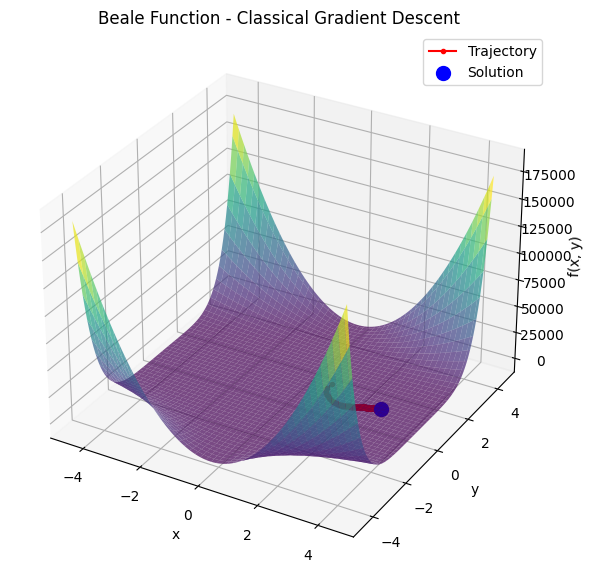


Testing Beale Function with Momentum Gradient Descent
Optimal solution: [3.00000098 0.50000055], Error: 1.1277811558687466e-06


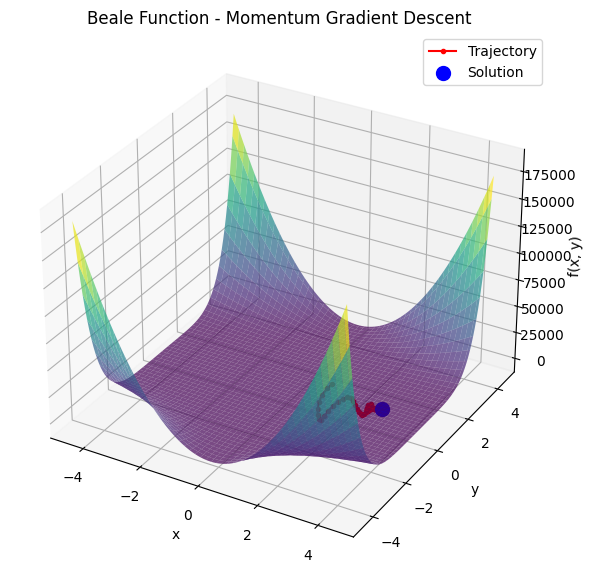


Testing Beale Function with AdaGrad
Optimal solution: [2.86395411 0.46339798], Error: 0.14088360883626472


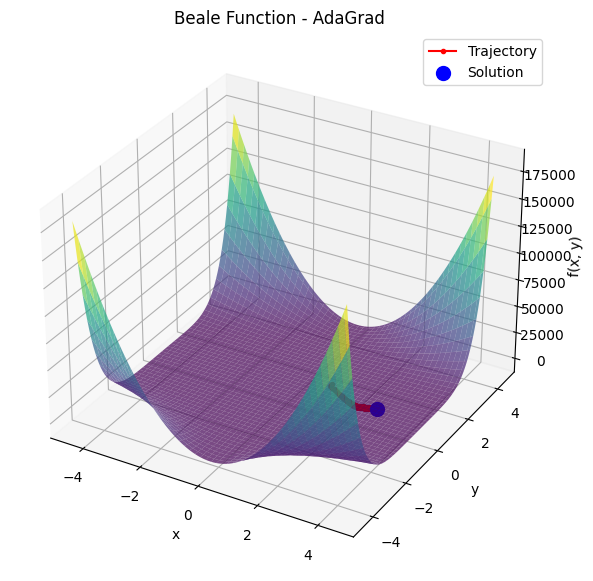


Testing Booth Function with Classical Gradient Descent
Optimal solution: [1.00000034 2.99999966], Error: 4.832065171139569e-07


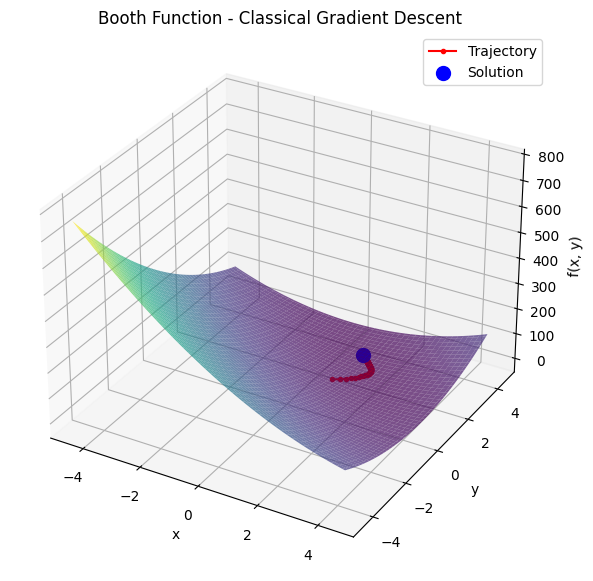


Testing Booth Function with Momentum Gradient Descent
Optimal solution: [0.99999993 2.99999958], Error: 4.253975316604934e-07


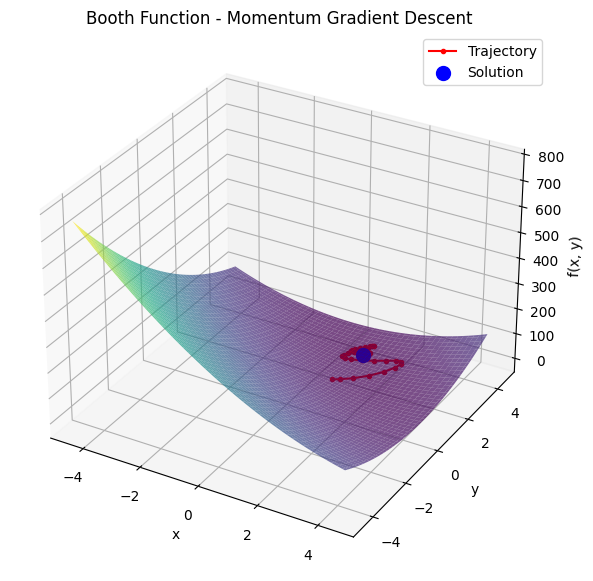


Testing Booth Function with AdaGrad
Optimal solution: [1.04217176 2.95519734], Error: 0.061528332123053135


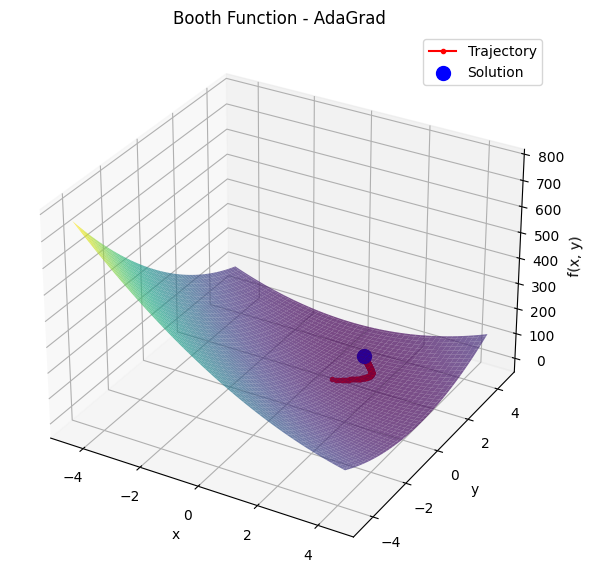


Testing Booth Function with Learning Rate Decay
Optimal solution: [1.00000032 2.99999968], Error: 4.485083456493877e-07


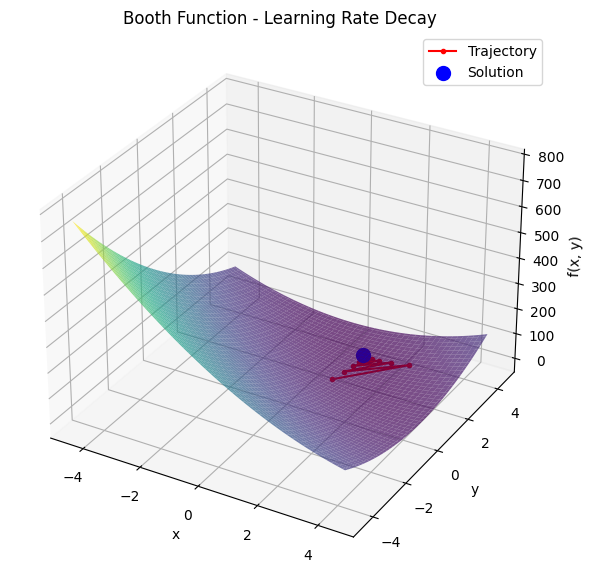

In [20]:
# 8. Тестирование всех функций
functions = [
    (beale_function, beale_gradient, np.array([3, 0.5]), "Beale Function"),
    (booth_function, booth_gradient, np.array([1, 3]), "Booth Function")
]
for f, grad_f, analytical_solution, name in functions:
    print(f"\nTesting {name} with Classical Gradient Descent")
    x_opt, trajectory = gradient_descent(f, grad_f, lr=0.01, start=(1, 1))
    error = compute_error(f, analytical_solution, x_opt)
    print(f"Optimal solution: {x_opt}, Error: {error}")
    plot_function(f, trajectory, title=f"{name} - Classical Gradient Descent")
    print(f"\nTesting {name} with Momentum Gradient Descent")
    x_opt, trajectory = gradient_descent_momentum(f, grad_f, lr=0.01, momentum=0.9, start=(1, 1))
    error = compute_error(f, analytical_solution, x_opt)
    print(f"Optimal solution: {x_opt}, Error: {error}")
    plot_function(f, trajectory, title=f"{name} - Momentum Gradient Descent")
    print(f"\nTesting {name} with AdaGrad")
    x_opt, trajectory = adagrad(f, grad_f, lr=0.1, start=(1, 1))
    error = compute_error(f, analytical_solution, x_opt)
    print(f"Optimal solution: {x_opt}, Error: {error}")
    plot_function(f, trajectory, title=f"{name} - AdaGrad")
    if name != "Beale Function":
        print(f"\nTesting {name} with Learning Rate Decay")
        x_opt, trajectory = gradient_descent_lr_decay(f, grad_f, lr=0.1, decay=0.99, start=(1, 1))
        error = compute_error(f, analytical_solution, x_opt)
        print(f"Optimal solution: {x_opt}, Error: {error}")
        plot_function(f, trajectory, title=f"{name} - Learning Rate Decay")